In [6]:
library(tidyverse)
library(readr)
library(ggplot2)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [7]:
# data_path <- '/Users/Krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/data/'
# setwd(data_path)

In [20]:
linux_data_path <- '/home/krista/Documents/gitRepositories/volatileValues/simple_rt_experiment_probabilityC/data/'
setwd(linux_data_path)

In [21]:
(files <- dir(path = linux_data_path, pattern = "^[0-9](.*)(_runInfo.csv)$"))

[1] "0761_cond0_trialset0_runInfo.csv" "0761_cond1_trialset0_runInfo.csv"
 [3] "0761_cond2_trialset0_runInfo.csv" "0761_cond3_trialset0_runInfo.csv"
 [5] "0762_cond0_trialset1_runInfo.csv" "0762_cond1_trialset1_runInfo.csv"
 [7] "0762_cond2_trialset1_runInfo.csv" "0762_cond3_trialset1_runInfo.csv"
 [9] "0763_cond0_trialset2_runInfo.csv" "0763_cond1_trialset2_runInfo.csv"
[11] "0763_cond2_trialset2_runInfo.csv" "0763_cond3_trialset2_runInfo.csv"
[13] "0764_cond0_trialset3_runInfo.csv" "0764_cond1_trialset3_runInfo.csv"
[15] "0764_cond2_trialset3_runInfo.csv" "0764_cond3_trialset3_runInfo.csv"
[17] "0765_cond0_trialset4_runInfo.csv" "0765_cond1_trialset4_runInfo.csv"
[19] "0765_cond2_trialset4_runInfo.csv" "0765_cond3_trialset4_runInfo.csv"
[21] "0766_cond0_trialset5_runInfo.csv" "0766_cond1_trialset5_runInfo.csv"
[23] "0766_cond2_trialset5_runInfo.csv" "0766_cond3_trialset5_runInfo.csv"

In [22]:
metadata <- files %>%
  map(read_csv,col_types = cols()) %>%                  
  reduce(rbind)      

In [51]:
(condition = map(files, substr, start=10, stop=10))
metadata$condition = as.numeric(condition)

[[1]]
[1] "0"

[[2]]
[1] "1"

[[3]]
[1] "2"

[[4]]
[1] "3"

[[5]]
[1] "0"

[[6]]
[1] "1"

[[7]]
[1] "2"

[[8]]
[1] "3"

[[9]]
[1] "0"

[[10]]
[1] "1"

[[11]]
[1] "2"

[[12]]
[1] "3"

[[13]]
[1] "0"

[[14]]
[1] "1"

[[15]]
[1] "2"

[[16]]
[1] "3"

[[17]]
[1] "0"

[[18]]
[1] "1"

[[19]]
[1] "2"

[[20]]
[1] "3"

[[21]]
[1] "0"

[[22]]
[1] "1"

[[23]]
[1] "2"

[[24]]
[1] "3"

In [39]:
(subject_number = map(files, substr, start=1, stop=4))
metadata$subject_number = as.numeric(subject_number)

[[1]]
[1] "0761"

[[2]]
[1] "0761"

[[3]]
[1] "0761"

[[4]]
[1] "0761"

[[5]]
[1] "0762"

[[6]]
[1] "0762"

[[7]]
[1] "0762"

[[8]]
[1] "0762"

[[9]]
[1] "0763"

[[10]]
[1] "0763"

[[11]]
[1] "0763"

[[12]]
[1] "0763"

[[13]]
[1] "0764"

[[14]]
[1] "0764"

[[15]]
[1] "0764"

[[16]]
[1] "0764"

[[17]]
[1] "0765"

[[18]]
[1] "0765"

[[19]]
[1] "0765"

[[20]]
[1] "0765"

[[21]]
[1] "0766"

[[22]]
[1] "0766"

[[23]]
[1] "0766"

[[24]]
[1] "0766"

In [52]:
dim(metadata); head(metadata,2)

[1] 24 18

psychopy_version,python_version,pythonScipyVersion,pyglet_version,pygame_version,numpy_version,wx_version,window_refresh_time_avg_ms,begin_time,exp_dir,last_sys_reboot,system_platform,internet_access,total_exp_time,break_time,subject_number,exp_time_min,condition
1.85.2,2.7.12,0.19.1,1.2.4,1.9.3,1.13.1,4.0.0b2 gtk3 (phoenix),33.33220,2018_04_16 15:21 (Year_Month_Day Hour:Min),/home/coaxlab/Dropbox/volatileValues/simple_rt_experiment_probabilityC,2018-04-16 15:00:00,linux 4.4.0-119-generic,True,1084.978,12.294594,761,18.08297,0
1.85.2,2.7.12,0.19.1,1.2.4,1.9.3,1.13.1,4.0.0b2 gtk3 (phoenix),33.33303,2018_04_15 20:26 (Year_Month_Day Hour:Min),/home/coaxlab/Dropbox/volatileValues/simple_rt_experiment_probabilityC,2018-04-15 20:17:00,linux 4.4.0-119-generic,True,1110.367,8.273055,761,18.50612,1


In [53]:
unique(metadata[,1:7]); unique(metadata[,13]); unique(metadata[,10])

psychopy_version,python_version,pythonScipyVersion,pyglet_version,pygame_version,numpy_version,wx_version
1.85.2,2.7.12,0.19.1,1.2.4,1.9.3,1.13.1,4.0.0b2 gtk3 (phoenix)


internet_access
True
False (proxies not attempted)


exp_dir
/home/coaxlab/Dropbox/volatileValues/simple_rt_experiment_probabilityC


In [54]:
metadata$exp_time_min <- metadata$total_exp_time / 60 

In [55]:
exp_time_plt <- ggplot(metadata, aes(exp_time_min)) + 
  geom_histogram(alpha=0.2,color='red',fill='red') 
break_time_plt <- ggplot(metadata, aes(break_time)) + 
  geom_histogram(alpha=0.2,color='green',fill='green') 
refresh_time_plt <- ggplot(metadata, aes(window_refresh_time_avg_ms)) + 
  geom_histogram(alpha=0.2,color='black',fill='black') 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


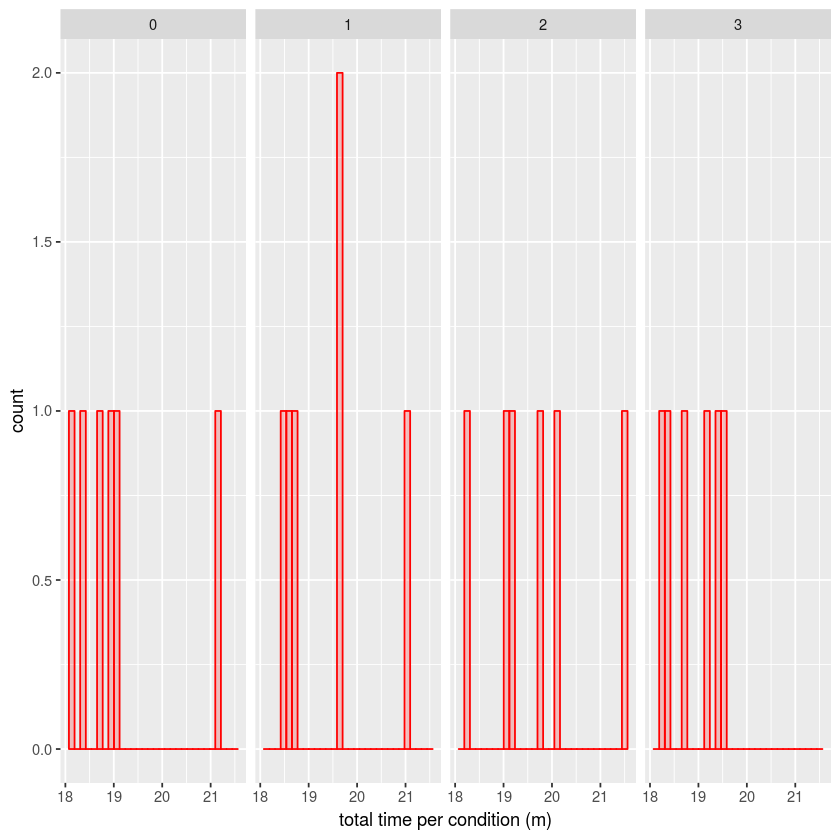

In [59]:
exp_time_plt + labs(x = "total time per condition (m)") + facet_grid( . ~ condition)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


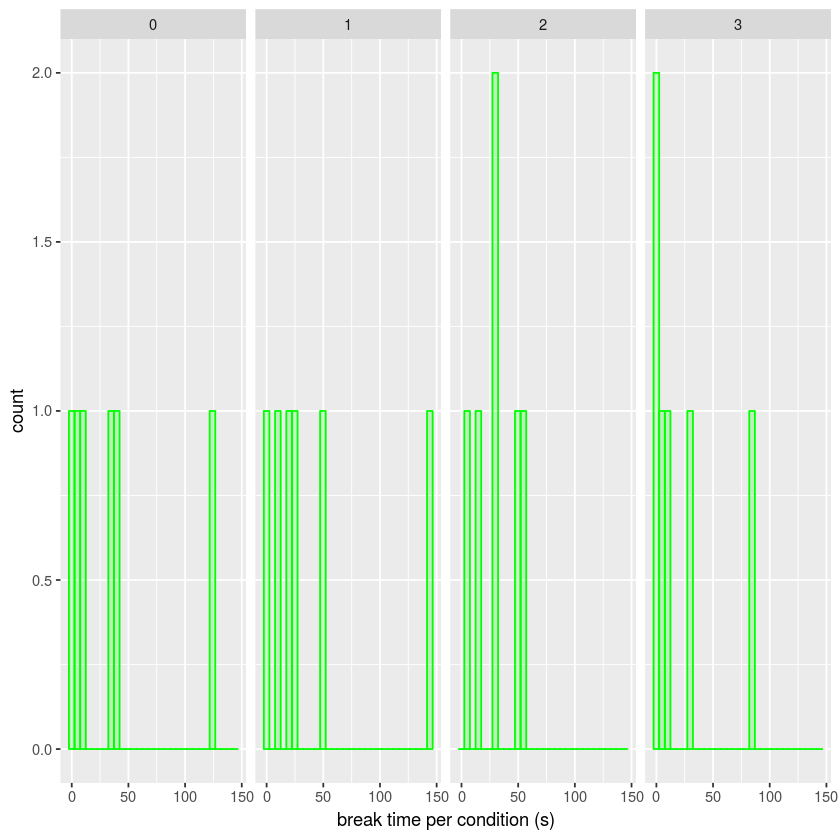

In [60]:
break_time_plt + labs(x = "break time per condition (s)")+ facet_grid( .~ condition)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


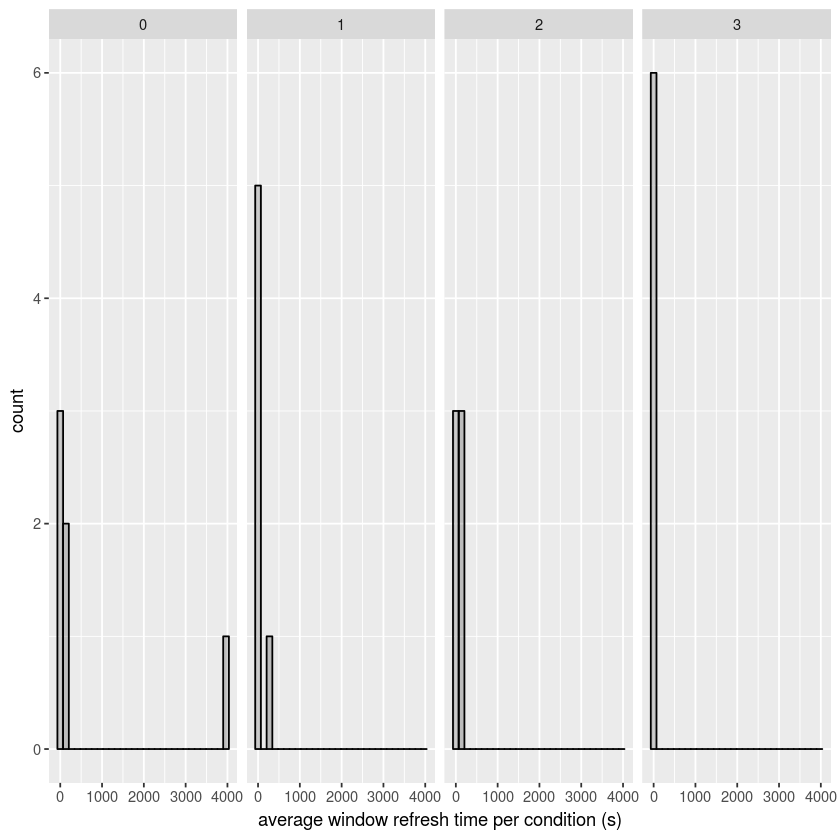

In [61]:
refresh_time_plt + labs(x = "average window refresh time per condition (s)") + facet_grid(.~condition)